In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold,GridSearchCV
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("MedicalInsurance.csv")
df.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


In [3]:
print(df.isna().sum())
print(df.info())

age         0
sex         0
bmi         0
smoker      0
region      0
children    0
charges     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3630 non-null   float64
 1   sex       3630 non-null   object 
 2   bmi       3630 non-null   float64
 3   smoker    3630 non-null   object 
 4   region    3630 non-null   object 
 5   children  3630 non-null   int64  
 6   charges   3630 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 198.6+ KB
None


In [4]:
df.describe()

,age,bmi,children,charges
count,3630.000000,3630.000000,3630.000000,3630.000000
mean,38.887036,30.629652,2.503581,12784.808644
std,12.151029,5.441307,1.712568,10746.166743
min,18.000000,15.960000,0.000000,1121.873900
25%,29.000000,26.694526,1.000000,5654.818262
50%,39.170922,30.200000,3.000000,9443.807222
75%,48.343281,34.100000,4.000000,14680.407505
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
encoder = LabelEncoder()
categorical_col = ['sex','smoker']
for i in categorical_col:
    df[i] = encoder.fit_transform(df[i])
df = pd.get_dummies(df, columns=['region'])
    

In [6]:
df.head()

,age,sex,bmi,smoker,children,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,21.000000,1,25.745000,0,2,3279.868550,True,False,False,False
1,36.976978,0,25.744165,1,3,21454.494239,False,False,True,False
2,18.000000,1,30.030000,0,1,1720.353700,False,False,True,False
3,37.000000,1,30.676891,0,3,6801.437542,True,False,False,False
4,58.000000,1,32.010000,0,1,11946.625900,False,False,True,False


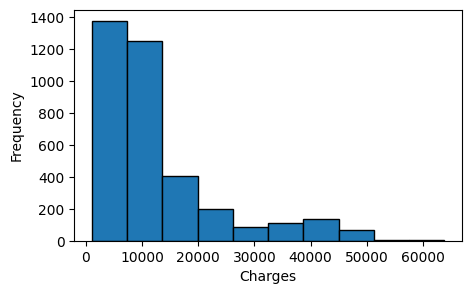

In [7]:
plt.figure(figsize=(5,3))
plt.hist(df['charges'], bins=10, edgecolor='black')
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()

In [8]:
df.corr()

,age,sex,bmi,smoker,children,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,-0.152745,0.143527,0.026564,-0.061076,0.299692,-0.022251,0.097243,0.048156,-0.128457
sex,-0.152745,1.000000,-0.011215,0.078318,0.147182,0.092703,0.106223,-0.180701,0.001615,0.077158
bmi,0.143527,-0.011215,1.000000,0.045921,-0.041996,0.211325,-0.037514,0.014488,0.070051,-0.051727
smoker,0.026564,0.078318,0.045921,1.000000,-0.183507,0.777175,0.056199,-0.034372,0.048327,-0.072273
children,-0.061076,0.147182,-0.041996,-0.183507,1.000000,-0.075089,-0.078339,-0.087854,0.068287,0.095720
charges,0.299692,0.092703,0.211325,0.777175,-0.075089,1.000000,0.112336,-0.043049,0.050719,-0.122019
region_northeast,-0.022251,0.106223,-0.037514,0.056199,-0.078339,0.112336,1.000000,-0.319576,-0.345378,-0.305286
region_northwest,0.097243,-0.180701,0.014488,-0.034372,-0.087854,-0.043049,-0.319576,1.000000,-0.362102,-0.320068
region_southeast,0.048156,0.001615,0.070051,0.048327,0.068287,0.050719,-0.345378,-0.362102,1.000000,-0.345910
region_southwest,-0.128457,0.077158,-0.051727,-0.072273,0.095720,-0.122019,-0.305286,-0.320068,-0.345910,1.000000


In [9]:
df['age'] = df['age'].round()
df.head()

,age,sex,bmi,smoker,children,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,21.0,1,25.745000,0,2,3279.868550,True,False,False,False
1,37.0,0,25.744165,1,3,21454.494239,False,False,True,False
2,18.0,1,30.030000,0,1,1720.353700,False,False,True,False
3,37.0,1,30.676891,0,3,6801.437542,True,False,False,False
4,58.0,1,32.010000,0,1,11946.625900,False,False,True,False


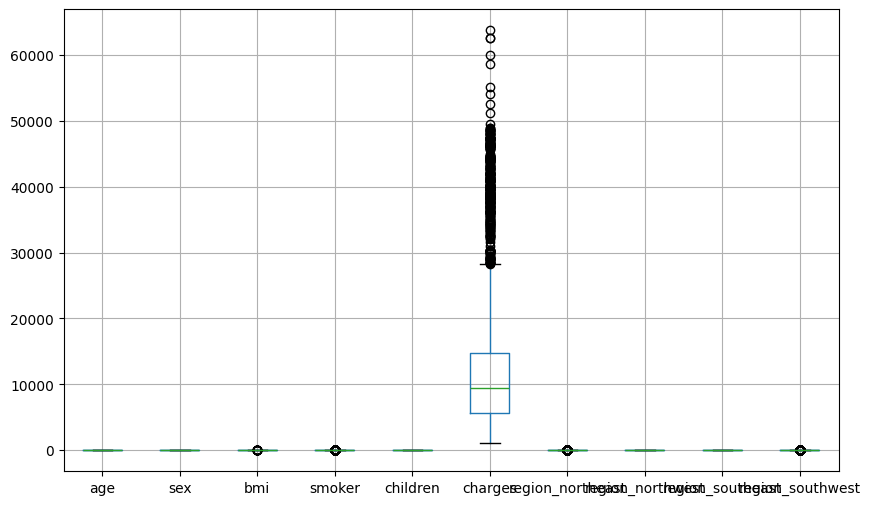

In [10]:
plt.figure(figsize=(10,6))  #To visualize outliers
df.boxplot()
plt.show()

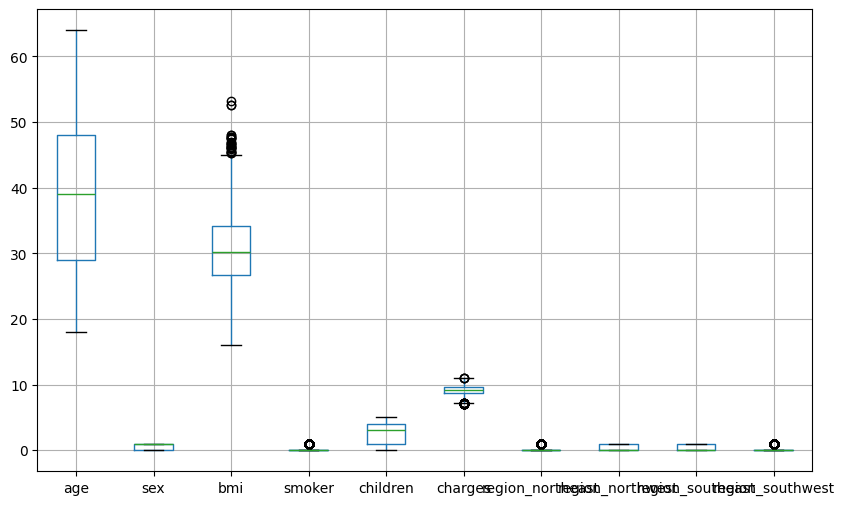

In [11]:
df['charges'] = np.log(df['charges'])    #Managing outliers with log transformation
plt.figure(figsize=(10,6))
df.boxplot()
plt.show()

# Remove outliers by jet score and more

In [12]:
scaler = StandardScaler()
df[['age','bmi','children']] = scaler.fit_transform(df[['age','bmi','children']])
df.head()

,age,sex,bmi,smoker,children,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.471963,1,-0.897822,0,-0.294091,8.095559,True,False,False,False
1,-0.155350,0,-0.897976,1,0.289908,9.973689,False,False,True,False
2,-1.718828,1,-0.110219,0,-0.878090,7.450285,False,False,True,False
3,-0.155350,1,0.008683,0,0.289908,8.824889,True,False,False,False
4,1.572703,1,0.253714,0,-0.878090,9.388204,False,False,True,False


In [13]:
lr = LinearRegression()
x = df.drop('charges', axis=1)
y = df['charges']

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42, test_size=0.2)

lr.fit(x_train, y_train)

pred = lr.predict(x_test)

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print(f'Mean Absolute Error: {mae} \nMean Squared Error: {mse} \nRoot Mean Squared Error: {rmse} \nR2-score: {r2}')

Mean Absolute Error: 0.2570111028817654 
Mean Squared Error: 0.15759883973234384 
Root Mean Squared Error: 0.3969872034868931 
R2-score: 0.7225844106727981


In [14]:
#Using kfold 

x = df.drop('charges',axis=1)
y = df['charges']

a,b,c,d = [], [], [], []

kf = KFold(n_splits=7, shuffle=True, random_state=42)
for tr,te in kf.split(x):
    x_train,x_test,y_train,y_test = x.iloc[tr],x.iloc[te],y.iloc[tr],y.iloc[te]
    reg = LinearRegression()
    reg.fit(x_train,y_train)
    pred = reg.predict(x_test)
    mae = mean_absolute_error(y_test, pred)
    a.append(mae)
    mse = mean_squared_error(y_test, pred)
    b.append(mse)
    rmse = np.sqrt(mse)
    c.append(rmse)
    r2 = r2_score(y_test, pred)
    d.append(r2)
mae,mse,rmse,r2 = np.mean(a), np.mean(b), np.mean(c), np.mean(d)

print("KFold")
print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R2: {r2}')

KFold
MAE: 0.26402975700250664, MSE: 0.16166709959313394, RMSE: 0.4016882709902176, R2: 0.7209921140825962


In [15]:
x = df.drop('charges', axis=1)
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42, test_size=0.2)

param_grid = {
    'n_neighbors' : [3,5,7,9,11],
    'weights' : ['uniform','distance'],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsRegressor()

gridsearch = GridSearchCV(knn, param_grid, cv=KFold(n_splits=7, shuffle=True, random_state=42), scoring='r2', n_jobs=-1)

gridsearch.fit(x_train,y_train)

best_params = gridsearch.best_params_
print("Best Parameters: ",best_params)

best_knn = gridsearch.best_estimator_

pred = best_knn.predict(x_test)

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print('Metrics with the best Knn model: ')
print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R2: {r2}')

Best Parameters:  {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Metrics with the best Knn model: 
MAE: 0.1170465424666996, MSE: 0.08779850120469573, RMSE: 0.29630811869521184, R2: 0.8454514449782017
